In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [72]:
crime_data_initial = pd.read_csv("C:/Users/SAI/OneDrive/Desktop/EXeclr/ExcelR_Assignments_Due/clustering assignment/crime_data.csv")
crime_data_initial.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [20]:
crime_data_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [21]:
#EDA: Treat duplicates
crime_data_initial[crime_data_initial.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [22]:
#EDA: Missing values
crime_data_initial.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [28]:
# Normalization 
n = MinMaxScaler()
data= n.fit_transform(crime_data_initial.iloc[:,1:].to_numpy())
crime_temp = pd.DataFrame(data, columns = crime_data_initial.columns[1:])
crime_temp.head(4)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245


# Hierarchical clustering

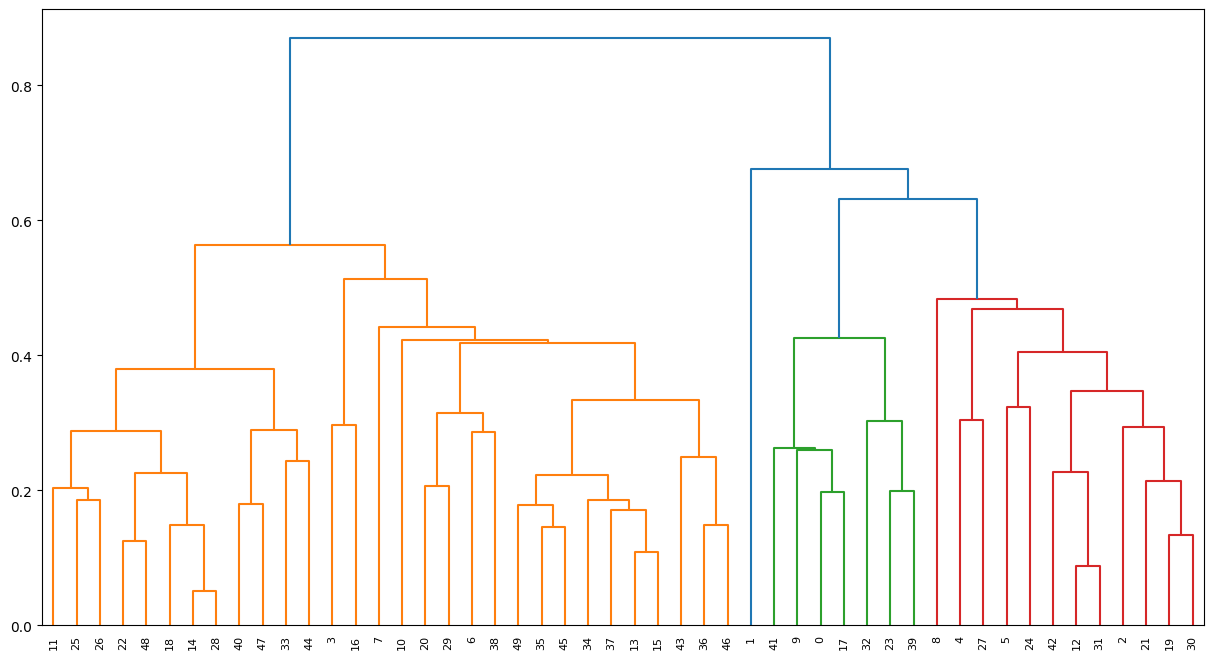

In [29]:
# create dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crime_temp, method='average'))

In [30]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [31]:
# save clusters for chart
y2 = hc1.fit_predict(crimes)
cc = pd.DataFrame(y2,columns=['Clusters'])
cc.head(6)

C:\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Clusters
0,3
1,2
2,1
3,0
4,1
5,1


In [35]:
crimes_final = pd.concat([crime_temp,cc],axis=1)

In [36]:
crimes_final.sort_values("Clusters").reset_index()

,index,Murder,Assault,UrbanPop,Rape,Clusters
0,49,0.361446,0.397260,0.474576,0.214470,0
1,28,0.078313,0.041096,0.406780,0.056848,0
2,34,0.391566,0.256849,0.728814,0.364341,0
3,26,0.210843,0.195205,0.508475,0.237726,0
4,25,0.313253,0.219178,0.355932,0.235142,0
5,48,0.108434,0.027397,0.576271,0.090439,0
6,35,0.349398,0.363014,0.610169,0.328165,0
7,22,0.114458,0.092466,0.576271,0.196382,0
8,36,0.246988,0.390411,0.593220,0.568475,0
9,20,0.216867,0.356164,0.898305,0.232558,0


In [37]:
crimes_final['Clusters'].value_counts()

0    30
1    12
3     7
2     1
Name: Clusters, dtype: int64

# K means clustering

In [38]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(crime_temp)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [39]:
kmeans.inertia_

3.6834561535859134

In [42]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_temp)
    wcss.append(kmeans.inertia_)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\A

In [43]:
wcss

[13.184122550256443,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.2250722560447906,
 2.8520398885211113,
 2.5848664114310447]

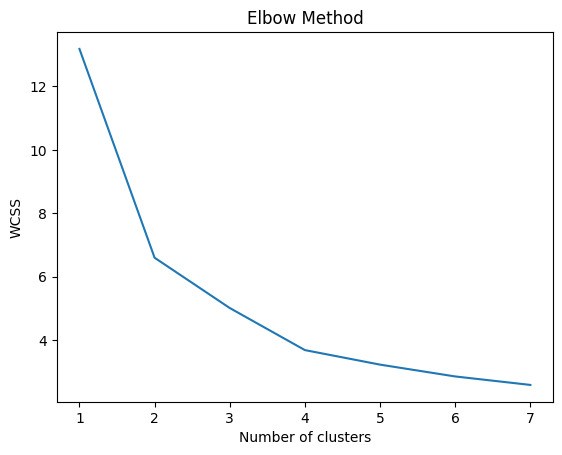

In [44]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
#Build Cluster algorithm
cc2 = KMeans(4, random_state=8)
cc2.fit(crime_temp)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=8)

In [47]:
cc2.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [48]:
# Converting array to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [51]:
crime_final = pd.concat([crime_temp,df2], axis=1)
crime_final.head(4)

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,1
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1


In [52]:
crime_final['clusters'].value_counts()

0    17
2    13
3    12
1     8
Name: clusters, dtype: int64

In [54]:
crime_final.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,0.304394,0.329371,0.705882,0.310990
1,0.791416,0.680223,0.368644,0.364664
2,0.168675,0.114858,0.340287,0.126019
3,0.612450,0.750000,0.754237,0.679802


# DBSCAN Clustering

In [55]:
array = crime_temp.values

In [56]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [57]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(X2)

DBSCAN(eps=0.98, min_samples=3)

In [59]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [60]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

In [73]:
crime_db_final = pd.concat([crime_data_initial,c2],axis=1)
crime_db_final

,State,Murder,Assault,UrbanPop,Rape,Cluster ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [77]:
crime_db_final.groupby('Cluster ID').agg(['mean'])

C:\Users\SAI\AppData\Local\Temp\ipykernel_8452\1871242146.py:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime_db_final.groupby('Cluster ID').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Cluster ID,,,,
-1,8.900000,221.750000,67.500000,28.641667
0,14.950000,237.000000,55.833333,22.616667
1,4.765385,111.961538,64.307692,15.830769
2,11.400000,234.666667,83.000000,25.200000
3,11.600000,280.000000,70.333333,31.666667
